# Customer Churn Prediction

## 📌 Project Overview
Customer churn prediction is the process of identifying customers who are likely to stop using a company's products or services. Retaining existing customers is often more cost-effective than acquiring new ones, making churn prediction a critical task for businesses such as telecom companies, banks, and subscription-based services.

The goal of this project is to build a machine learning model that predicts whether a customer will churn (leave) or stay, based on their historical data and behavior patterns.

---

## 🎯 Objectives
- Analyze customer data to identify key factors that contribute to churn.
- Build predictive models to classify customers as "Churn" or "Not Churn".
- Evaluate model performance using metrics such as accuracy, precision, recall, and F1-score.
- Provide actionable insights for customer retention strategies.

---

## 📂 Dataset
- **Source:** [Telco Customer Churn Dataset (Kaggle)](https://www.kaggle.com/blastchar/telco-customer-churn)
- **Features:** Customer demographics, account information, service usage, and contract details.
- **Target Variable:** `Churn` (Yes/No)

---

## 🛠️ What You’ll Learn
To complete this project, you should study:
- **Exploratory Data Analysis (EDA):** Data cleaning, handling missing values, feature engineering.
- **Machine Learning Models:** Logistic Regression, Decision Trees, Random Forests, Gradient Boosting.
- **Model Evaluation:** Confusion Matrix, ROC Curve, Precision-Recall tradeoff.
- **Imbalanced Data Handling:** SMOTE, undersampling, oversampling (since churn datasets are often imbalanced).

---

## 🚀 Expected Outcome
- A trained model that can predict customer churn with good accuracy.
- Insights into which features (e.g., contract type, payment method, service usage) most influence churn.
- A simple dashboard or report for stakeholders to understand customer retention risks.

---


## loading the data 

In [27]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import seaborn as sns 
import matplotlib.pyplot as plt 

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [28]:
df.shape

(7043, 21)

In [29]:
## customer ID is useless 
df.drop('customerID' , axis=1 , inplace=True)

In [30]:
df.TotalCharges.dtype

dtype('O')

In [31]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce')   ## this will ignore the null values for string conversion 

## data analysis and preprocessing 

In [32]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [34]:
## dividing the features into categorical features and numerical features  

cat_features=["gender","Partner","Dependents","PhoneService","MultipleLines",
              "InternetService","OnlineSecurity","OnlineBackup",
              "DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
              "Contract","PaperlessBilling","PaymentMethod" ,"SeniorCitizen"
              ] 
num_features=["tenure","MonthlyCharges","TotalCharges"]



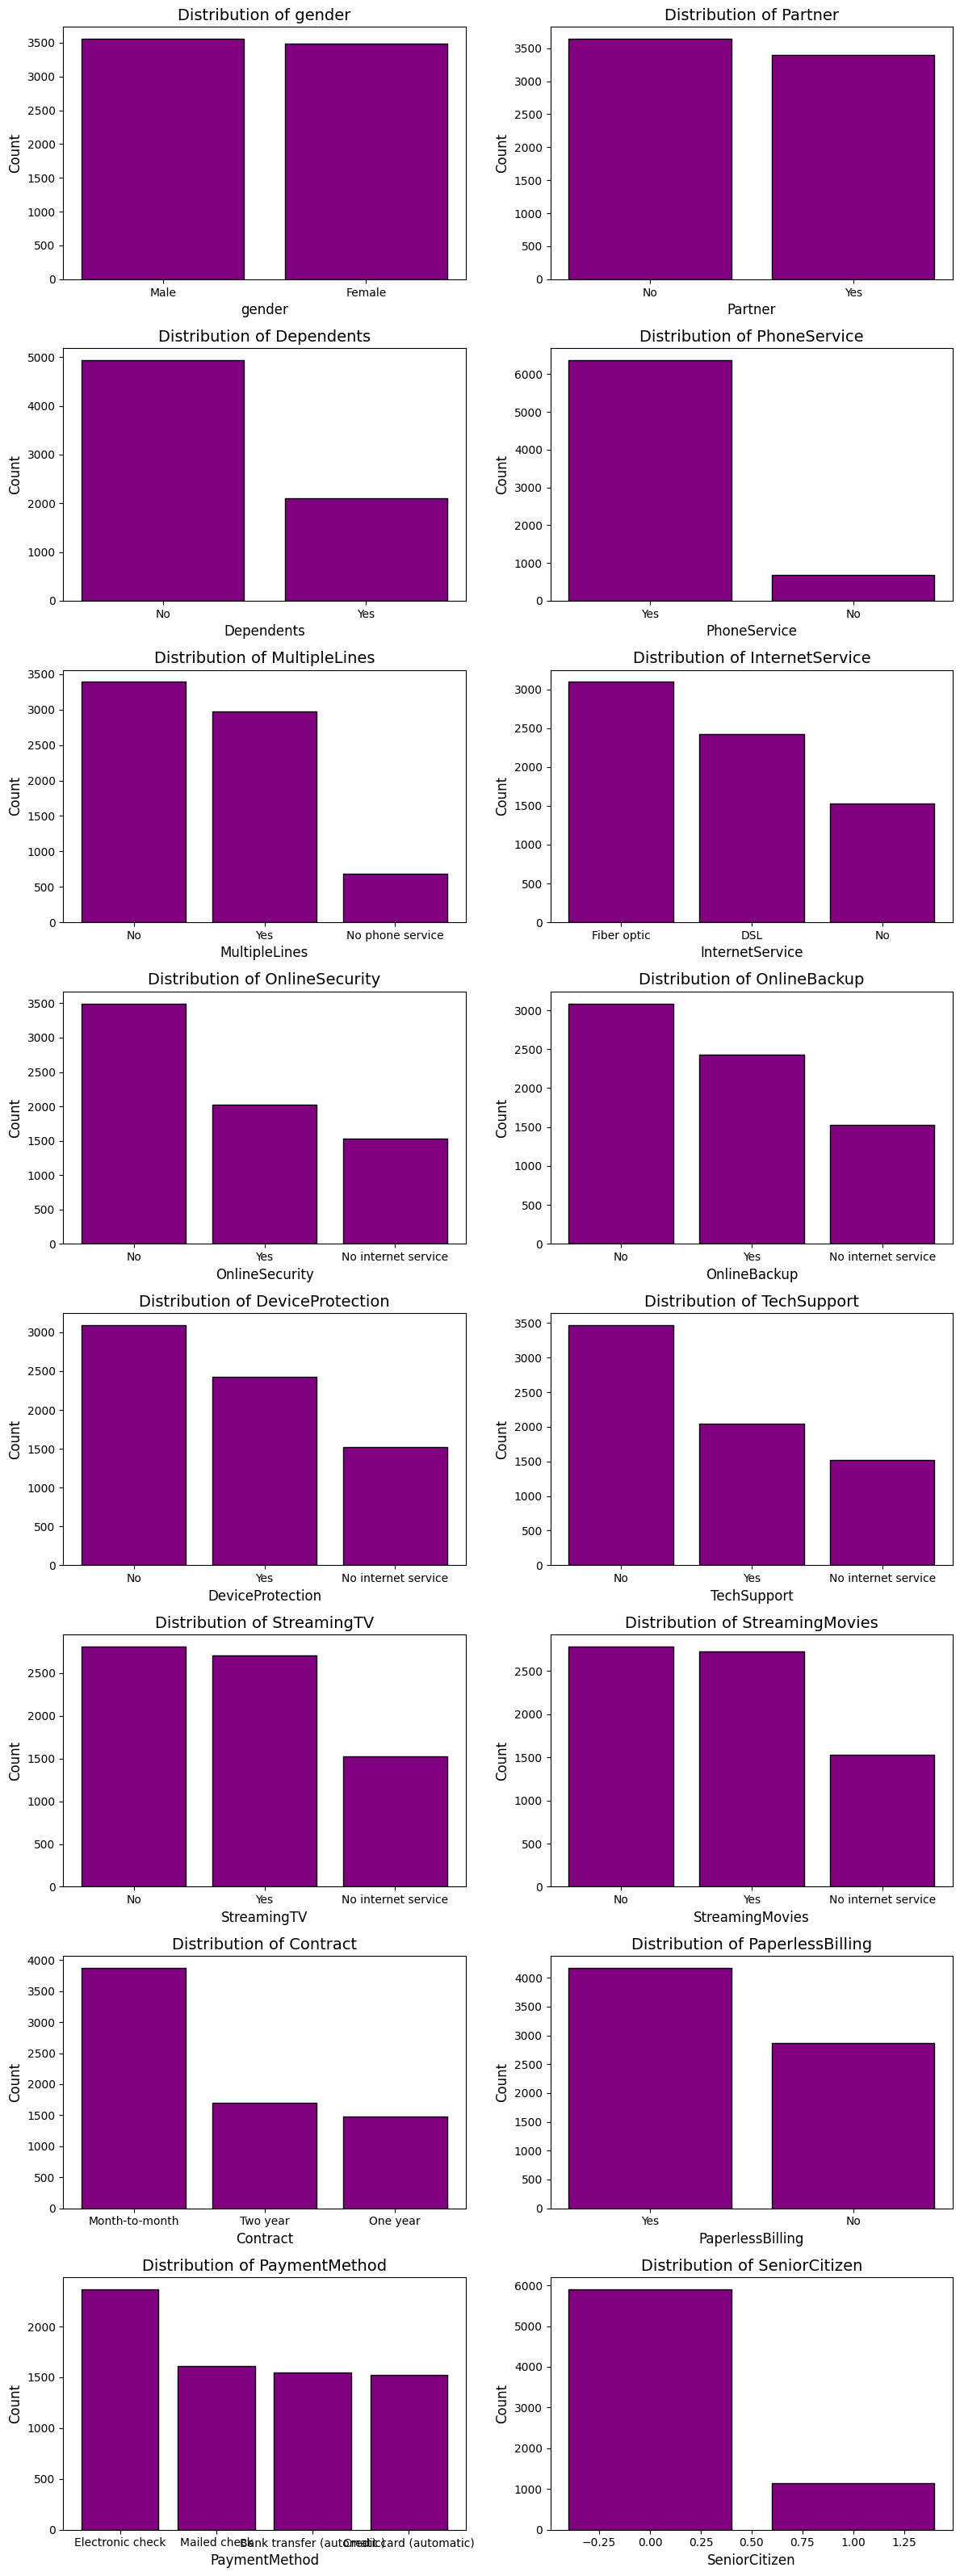

In [35]:

import matplotlib.pyplot as plt
import math

# Number of features
n_features = len(cat_features)

# Choose number of columns for grid (e.g., 2 plots per row)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

# Create grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten() 

for i, feature in enumerate(cat_features):
    counts = df[feature].value_counts()
    axes[i].bar(counts.index, counts.values, color="purple", edgecolor="black")
    axes[i].set_title(f"Distribution of {feature}", fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)


plt.tight_layout()
plt.show()



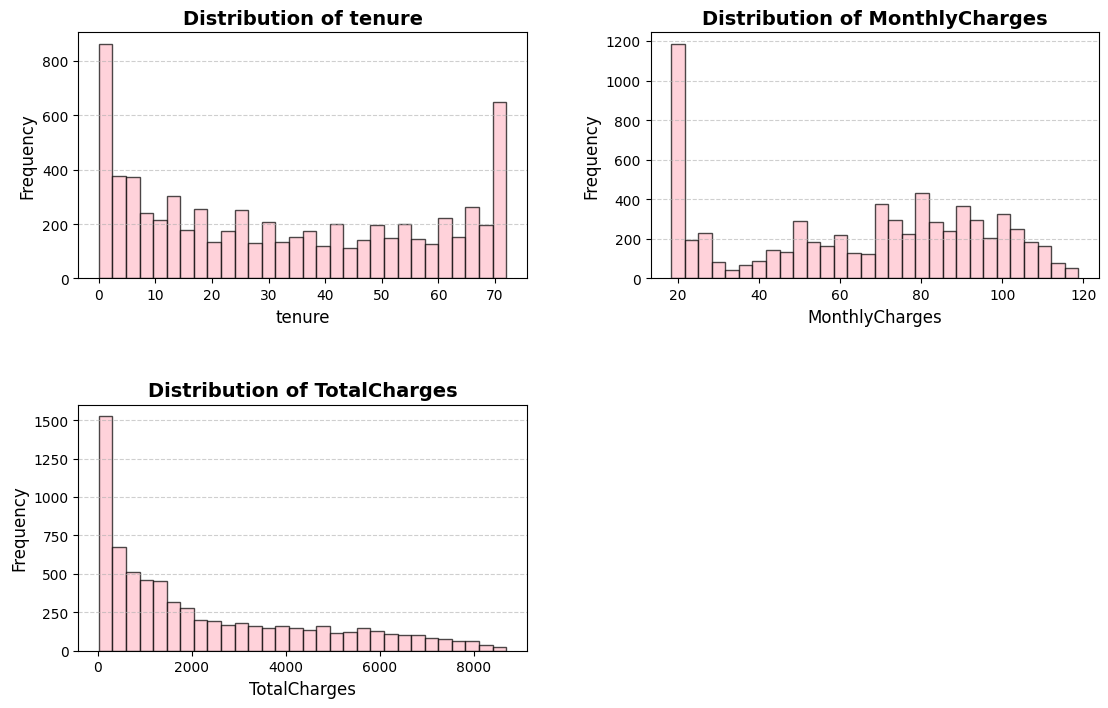

In [36]:
## plotting the numerical distribution 
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid
axes = axes.flatten()

for i, feature in enumerate(num_features):
    axes[i].hist(df[feature], bins=30, color="pink", edgecolor="black", alpha=0.7)
    axes[i].set_title(f"Distribution of {feature}", fontsize=14, fontweight="bold")
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)
    

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout(pad=4)
plt.show()

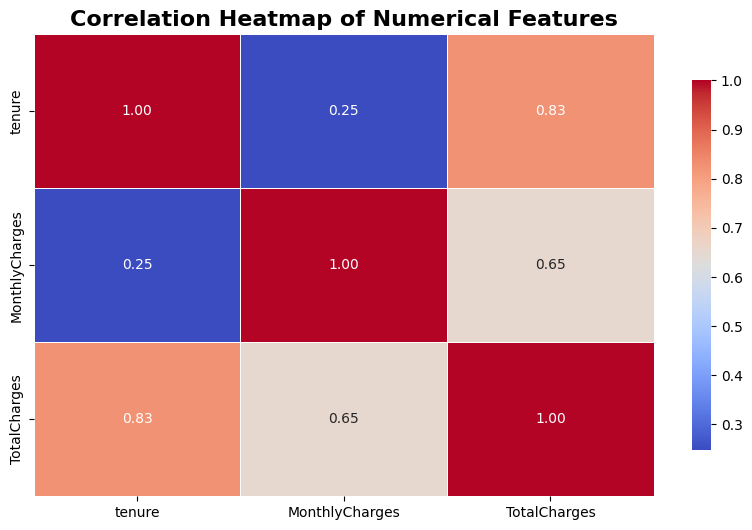

In [37]:
## correclation analysis of numerical features 

corr = df[num_features].corr()

# Set figure size
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    annot=True,          # show correlation values
    fmt=".2f",           # 2 decimal places
    cmap="coolwarm",     # diverging colormap
    linewidths=0.5,  
    cbar_kws={"shrink": .8}
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, fontweight="bold")
plt.show()


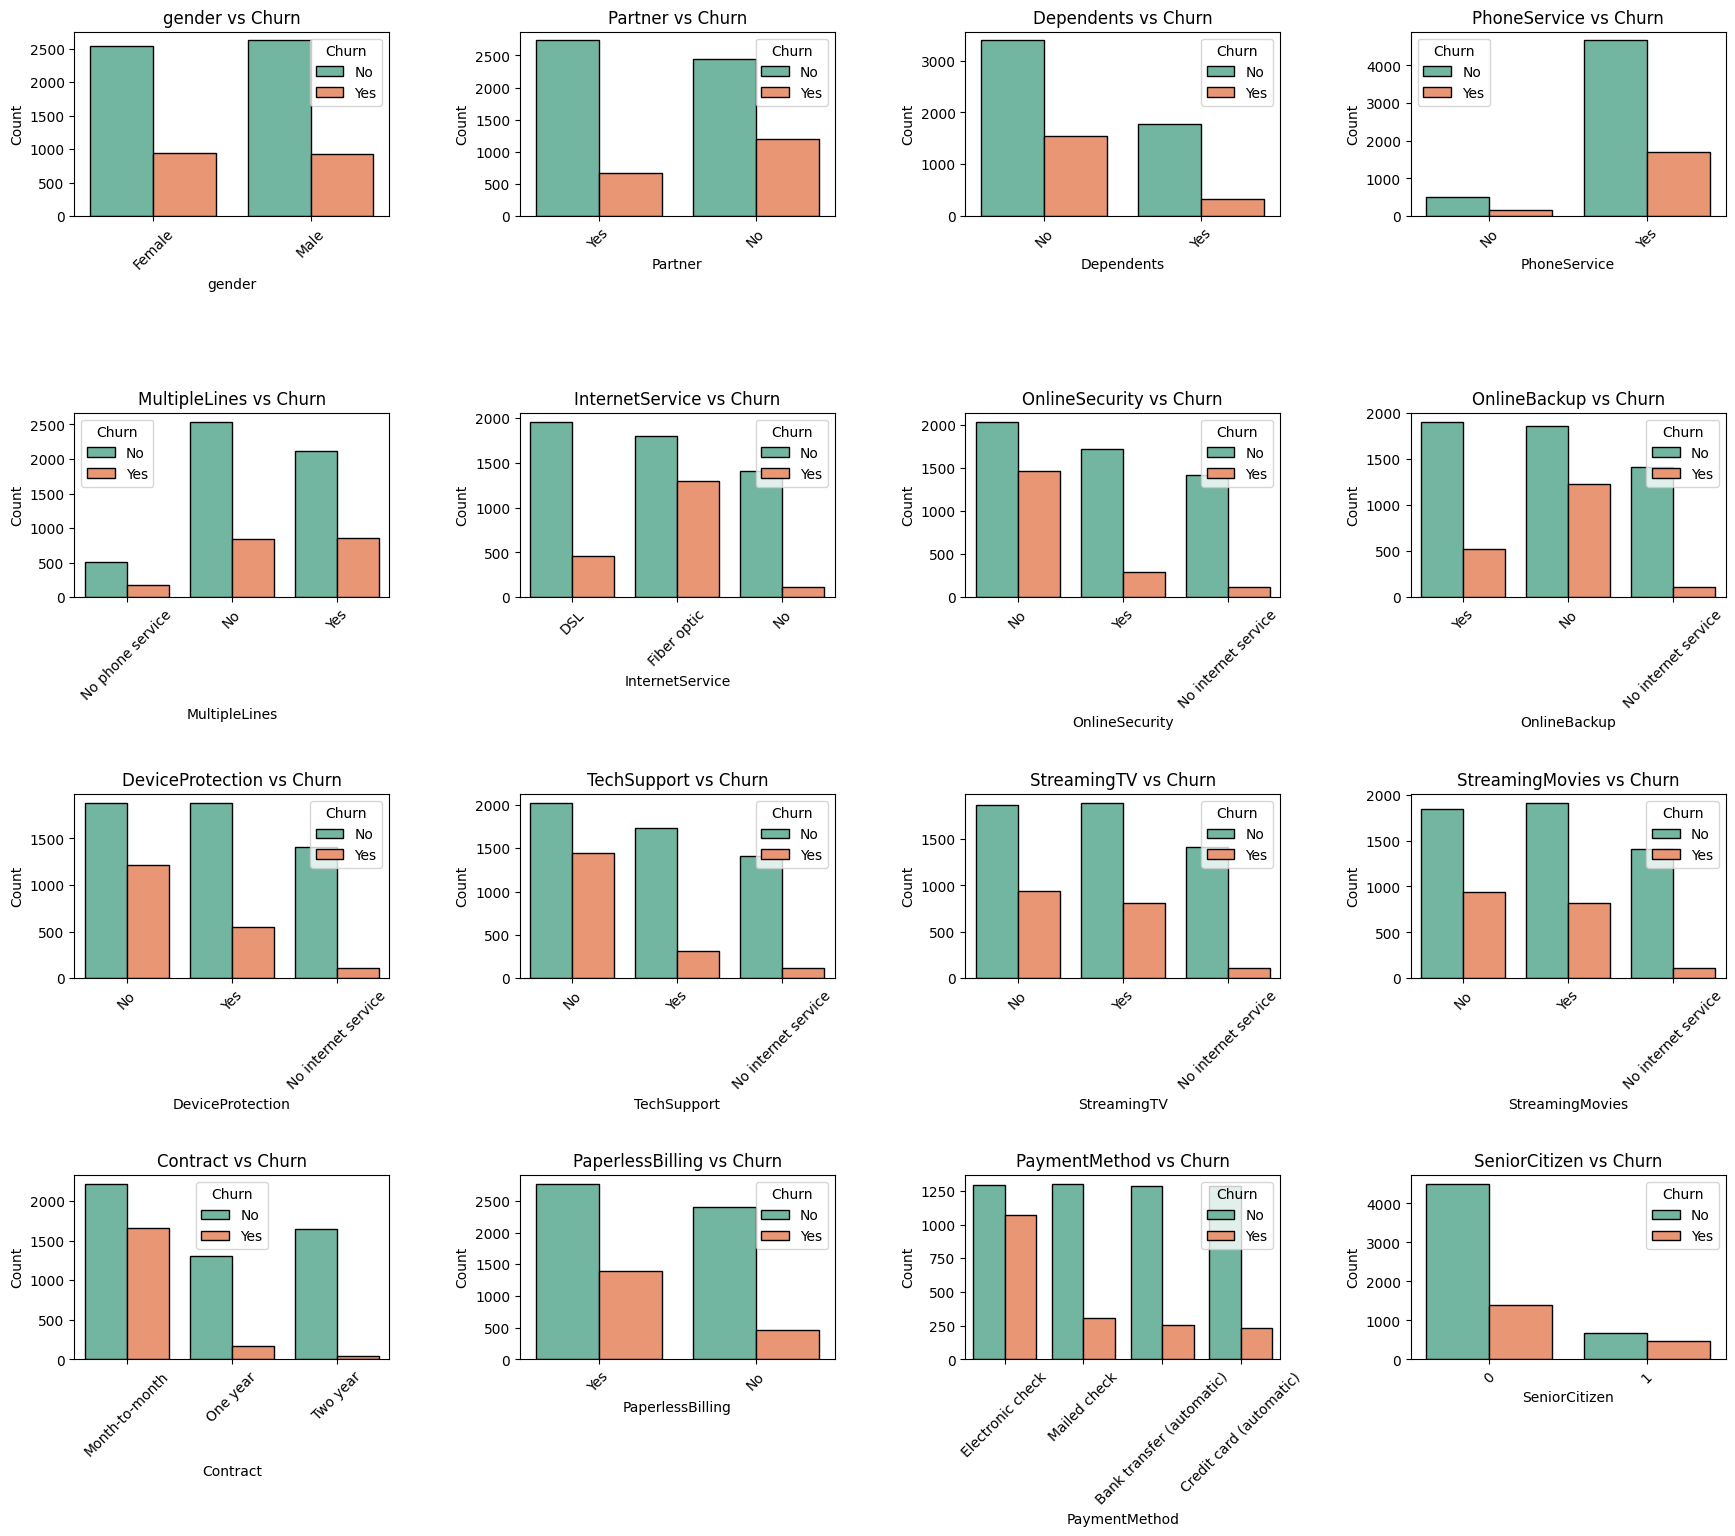

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

n_features = len(cat_features)

# 4 rows × 4 cols grid (16 features)
fig, axes = plt.subplots(4, 4, figsize=(18, 16))  
axes = axes.flatten()

for i, feature in enumerate(cat_features):
    sns.countplot(
        data=df,
        x=feature,
        hue="Churn",     
        ax=axes[i],
        palette="Set2",
        edgecolor="black"
    )
    axes[i].set_title(f"{feature} vs Churn", fontsize=12)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel("Count", fontsize=10)
    axes[i].tick_params(axis="x", rotation=45)

# Hide any unused subplots (in case features < 16)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()




C:\Users\shahd\AppData\Local\Temp\ipykernel_10048\2224692693.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\shahd\AppData\Local\Temp\ipykernel_10048\2224692693.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\shahd\AppData\Local\Temp\ipykernel_10048\2224692693.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


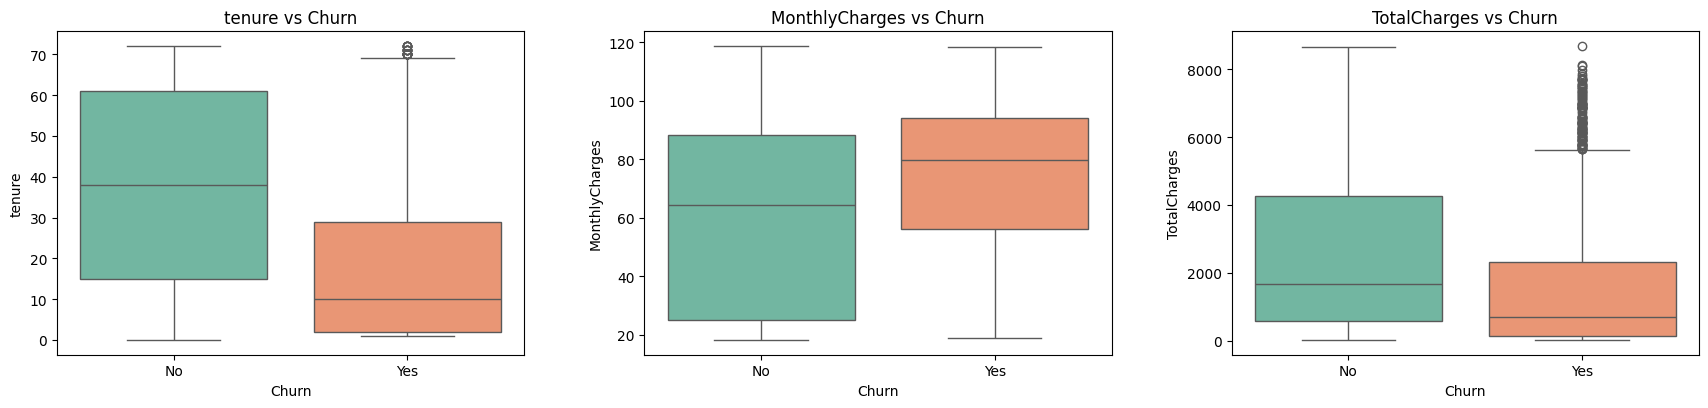

In [39]:
## numerical features analysis with target variable
import seaborn as sns
import matplotlib.pyplot as plt
import math

n_features = len(num_features)

# auto grid size (square-ish)
n_cols = 3  
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(num_features):
    sns.boxplot(
        data=df,
        x="Churn", 
        y=feature,
        palette="Set2",
        ax=axes[i]
    )
    axes[i].set_title(f"{feature} vs Churn", fontsize=12)
    axes[i].set_xlabel("Churn", fontsize=10)
    axes[i].set_ylabel(feature, fontsize=10)

# remove unused axes if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=4)
plt.show()
 


In [40]:
# let's dive into the preprocessing stage 
## removing missing values 
# for feature in df.columns:
#     missing_count=df[feature].isnull().sum()
#     print(missing_count) 
    
## so we will automatically drop these values for simplicity and they are very small 

df.dropna(inplace=True)

df.shape


(7032, 20)

In [41]:
## label encoding process 

for col in cat_features:
    print(f'{col} had values of {df[col].unique()}')

gender had values of ['Female' 'Male']
Partner had values of ['Yes' 'No']
Dependents had values of ['No' 'Yes']
PhoneService had values of ['No' 'Yes']
MultipleLines had values of ['No phone service' 'No' 'Yes']
InternetService had values of ['DSL' 'Fiber optic' 'No']
OnlineSecurity had values of ['No' 'Yes' 'No internet service']
OnlineBackup had values of ['Yes' 'No' 'No internet service']
DeviceProtection had values of ['No' 'Yes' 'No internet service']
TechSupport had values of ['No' 'Yes' 'No internet service']
StreamingTV had values of ['No' 'Yes' 'No internet service']
StreamingMovies had values of ['No' 'Yes' 'No internet service']
Contract had values of ['Month-to-month' 'One year' 'Two year']
PaperlessBilling had values of ['Yes' 'No']
PaymentMethod had values of ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
SeniorCitizen had values of [0 1]


In [42]:
df['MultipleLines']=df['MultipleLines'].str.replace('No phone service','No')
df['OnlineSecurity']=df['OnlineSecurity'].str.replace('No internet service','No')
df['OnlineBackup']=df['OnlineBackup'].str.replace('No internet service','No')
df['DeviceProtection']=df['DeviceProtection'].str.replace('No internet service','No')
df['TechSupport']=df['TechSupport'].str.replace('No internet service','No')
df['StreamingTV']=df['StreamingTV'].str.replace('No internet service','No')
df['StreamingMovies']=df['StreamingMovies'].str.replace('No internet service','No')


In [43]:

for col in cat_features:
    print(f'{col} had values of {df[col].unique()}')

gender had values of ['Female' 'Male']
Partner had values of ['Yes' 'No']
Dependents had values of ['No' 'Yes']
PhoneService had values of ['No' 'Yes']
MultipleLines had values of ['No' 'Yes']
InternetService had values of ['DSL' 'Fiber optic' 'No']
OnlineSecurity had values of ['No' 'Yes']
OnlineBackup had values of ['Yes' 'No']
DeviceProtection had values of ['No' 'Yes']
TechSupport had values of ['No' 'Yes']
StreamingTV had values of ['No' 'Yes']
StreamingMovies had values of ['No' 'Yes']
Contract had values of ['Month-to-month' 'One year' 'Two year']
PaperlessBilling had values of ['Yes' 'No']
PaymentMethod had values of ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
SeniorCitizen had values of [0 1]


In [44]:
binary_features=["Partner","Dependents","PhoneService",
                 "MultipleLines","OnlineSecurity","OnlineBackup",
                 "DeviceProtection","TechSupport","StreamingTV",
                 "StreamingMovies","PaperlessBilling","Churn"
                 ]

for col in binary_features:
    df[col]=df[col].replace({'Yes':1,'No':0})


C:\Users\shahd\AppData\Local\Temp\ipykernel_10048\2342068884.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col]=df[col].replace({'Yes':1,'No':0})


In [45]:

for col in cat_features:
    print(f'{col} had values of {df[col].unique()}')

gender had values of ['Female' 'Male']
Partner had values of [1 0]
Dependents had values of [0 1]
PhoneService had values of [0 1]
MultipleLines had values of [0 1]
InternetService had values of ['DSL' 'Fiber optic' 'No']
OnlineSecurity had values of [0 1]
OnlineBackup had values of [1 0]
DeviceProtection had values of [0 1]
TechSupport had values of [0 1]
StreamingTV had values of [0 1]
StreamingMovies had values of [0 1]
Contract had values of ['Month-to-month' 'One year' 'Two year']
PaperlessBilling had values of [1 0]
PaymentMethod had values of ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
SeniorCitizen had values of [0 1]


In [46]:
df['gender'].replace({'Female':0,"Male":1}, inplace=True )

C:\Users\shahd\AppData\Local\Temp\ipykernel_10048\1209584537.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'Female':0,"Male":1}, inplace=True )
C:\Users\shahd\AppData\Local\Temp\ipykernel_10048\1209584537.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].re

In [47]:

for col in cat_features:
    print(f'{col} had values of {df[col].unique()}')

gender had values of [0 1]
Partner had values of [1 0]
Dependents had values of [0 1]
PhoneService had values of [0 1]
MultipleLines had values of [0 1]
InternetService had values of ['DSL' 'Fiber optic' 'No']
OnlineSecurity had values of [0 1]
OnlineBackup had values of [1 0]
DeviceProtection had values of [0 1]
TechSupport had values of [0 1]
StreamingTV had values of [0 1]
StreamingMovies had values of [0 1]
Contract had values of ['Month-to-month' 'One year' 'Two year']
PaperlessBilling had values of [1 0]
PaymentMethod had values of ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
SeniorCitizen had values of [0 1]


In [48]:
df=pd.get_dummies(data=df , columns=['InternetService','Contract','PaymentMethod'])

In [49]:
## scaling the numerical features 
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

for feature in num_features:
    df[feature] = scaler.fit_transform(df[[feature]])  
    
df.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,0.464789,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,0.014085,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,0.619718,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,0.014085,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [50]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [51]:
## splitting the data into train test features
from sklearn.model_selection import train_test_split
x=df.drop('Churn' , axis=1)
y=df['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2 )

In [52]:
x_train.shape

(5625, 26)

In [53]:
x_train.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
Contract_Month-to-month        

## model preparation and evaluation 

In [54]:


model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print(x_train.shape)
history = model.fit(x_train, y_train, epochs=100)


(5625, 26)
Epoch 1/100


c:\Users\shahd\miniconda3\envs\ML_inv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6297 - loss: 0.6198
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7884 - loss: 0.4405
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7927 - loss: 0.4245
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7989 - loss: 0.4211
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8016 - loss: 0.4171
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8021 - loss: 0.4152
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8044 - loss: 0.4137
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8066 - loss: 0.4117
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8066 - loss: 0.4114
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8048 - loss: 0.4108
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8059 - loss: 0.4094
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [55]:
model.evaluate(x_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7989 - loss: 0.4303


[0.430320143699646, 0.7988628149032593]

In [56]:
from sklearn.metrics import classification_report , confusion_matrix  

y_predict=model.predict(x_test)
print(y_predict[:5])

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0.24919797]
 [0.05472657]
 [0.5343447 ]
 [0.01801053]
 [0.3540984 ]]


In [59]:
## let's get the predictions into 0 and 1s
y_pre_class=[]
for prediction in y_predict:
    if prediction[0]>0.5:
        y_pre_class.append(1)
    else:
        y_pre_class.append(0)
        
y_pre_class[:5]

[0, 0, 1, 0, 0]

In [61]:
print(classification_report(y_test,y_pre_class))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.53      0.58       372

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



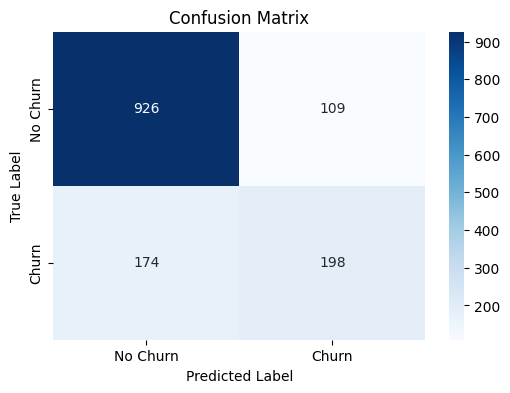

In [63]:
cm = confusion_matrix(y_test, y_pre_class)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

